In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(
    "/Users/tuhinalambijoy/Documents/Data_Science_Assignment/cleand_assignment_datads.csv"
)
df

,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,56,780.24,6.0,68.11,50.16,646
1,46,1657.77,2.0,86.29,9.86,850
2,32,658.35,7.0,94.72,68.35,656
3,60,1426.70,3.0,76.01,37.54,850
4,25,1568.41,3.0,76.01,12.64,850
...,...,...,...,...,...,...
995,22,978.50,6.0,95.78,33.06,789
996,40,761.27,1.0,80.82,74.47,580
997,27,1111.06,8.0,62.31,41.24,773
998,61,991.12,7.0,84.53,19.58,816


# Credit score distribution & range


Credit Score stats:
count    1000.000000
mean      732.255000
std       123.243795
min       395.000000
25%       634.000000
50%       768.000000
75%       850.000000
max       850.000000
Name: credit_score, dtype: float64
Range: 455


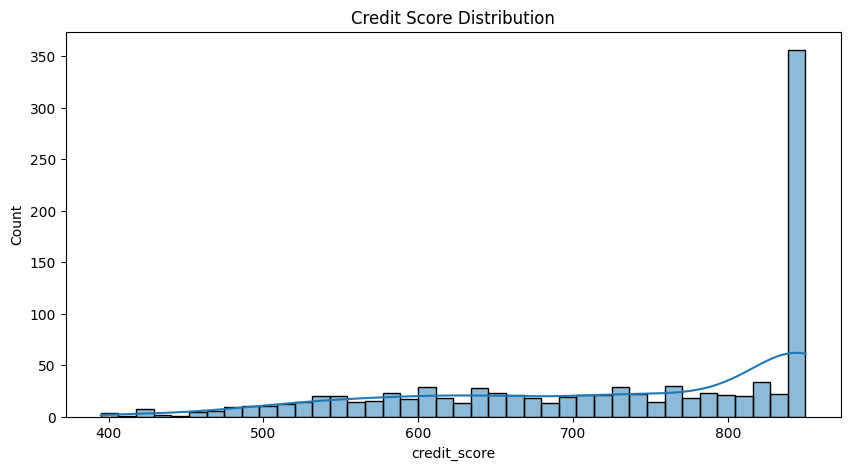

In [4]:
print("\nCredit Score stats:")
print(df['credit_score'].describe())
print("Range:", df['credit_score'].max() - df['credit_score'].min())

plt.figure(figsize=(10,5))
sns.histplot(df['credit_score'], bins=40, kde=True)
plt.title("Credit Score Distribution")
plt.show()

# Average credit score by financial responsibility


Credit Score stats:
count    1000.000000
mean      732.255000
std       123.243795
min       395.000000
25%       634.000000
50%       768.000000
75%       850.000000
max       850.000000
Name: credit_score, dtype: float64
Range: 455

Avg credit score by Financial Responsibility:
                             mean  count     std
financial_responsibility                       
1.0                       671.15     93  139.53
2.0                       714.42     84  127.37
3.0                       718.81    101  127.09
4.0                       726.03    100  123.01
5.0                       730.23    166  122.46
6.0                       749.14     90  120.15
7.0                       755.43     88  120.18
8.0                       750.93    103  114.95
9.0                       745.49     91  112.18
10.0                      765.70     84   98.87

Sample means for responsibility levels 1, 5, 10:
                            mean  count     std
financial_responsibility                   

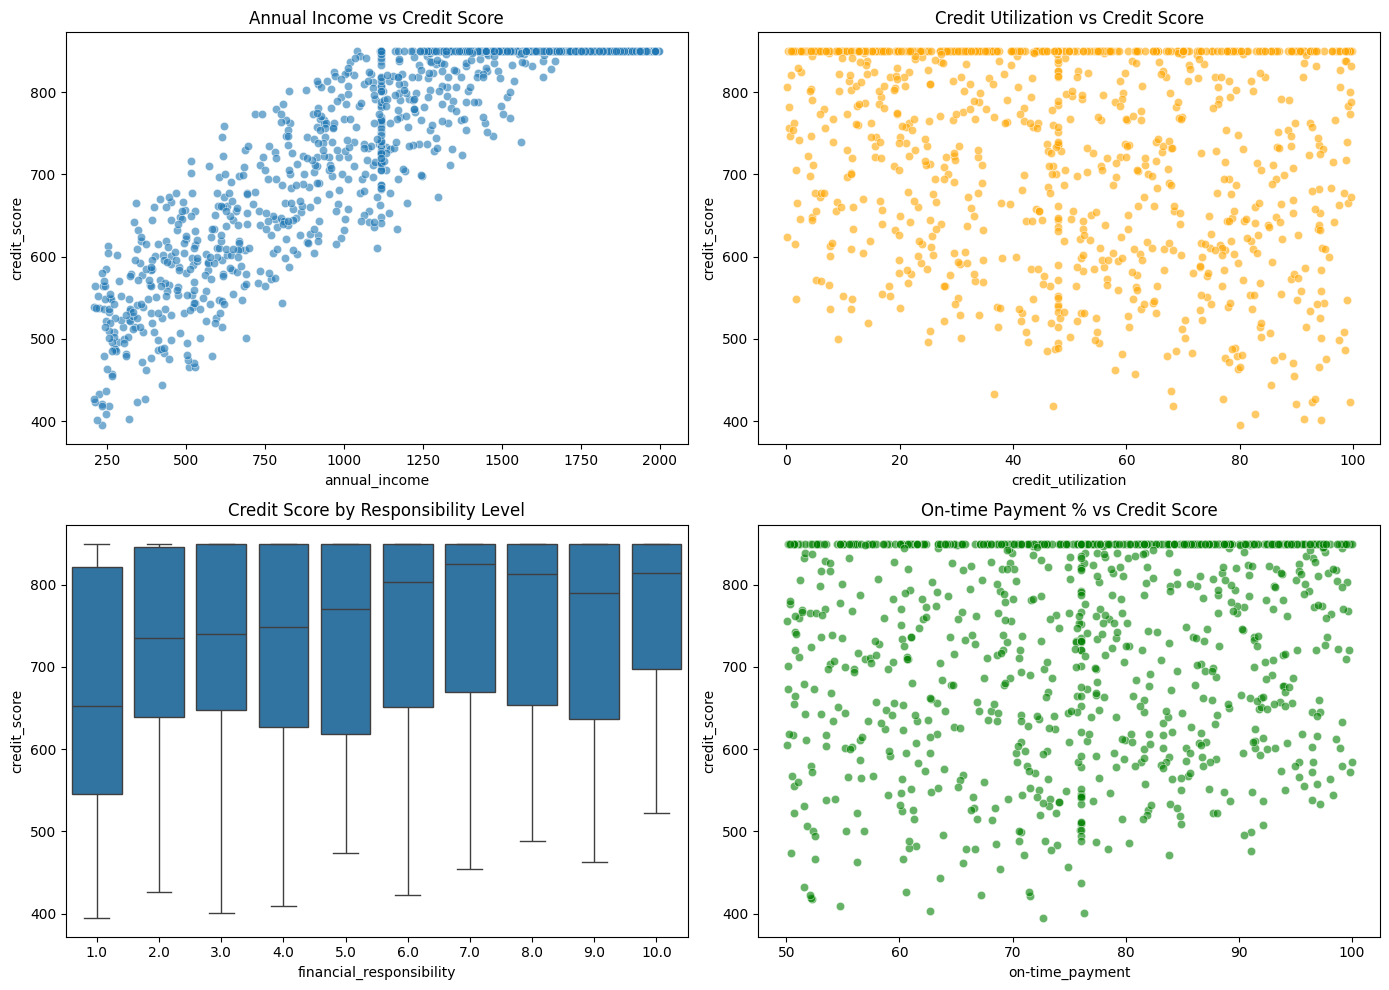

In [10]:
um_cols = ['age', 'annual_income', 'financial_responsibility',
            'on-time_payment', 'credit_utilization']

# Credit score stats
print("\nCredit Score stats:")
print(df['credit_score'].describe())
print("Range:", df['credit_score'].max() - df['credit_score'].min())

# Average credit score by financial responsibility
avg_by_resp = df.groupby('financial_responsibility')['credit_score'].agg(['mean', 'count', 'std']).round(2)
print("\nAvg credit score by Financial Responsibility:\n", avg_by_resp)

# Sample groups (1, 5, 10)
print("\nSample means for responsibility levels 1, 5, 10:")
print(avg_by_resp.loc[[1.0, 5.0, 10.0]])

# Correlations – now using correct column names
corr_matrix = df[num_cols + ['credit_score']].corr()
corr_with_score = corr_matrix['credit_score'].sort_values(ascending=False)
print("\nCorrelation with credit_score:\n", corr_with_score.round(3))

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='annual_income', y='credit_score', alpha=0.6)
plt.title("Annual Income vs Credit Score")

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='credit_utilization', y='credit_score', alpha=0.6, color='orange')
plt.title("Credit Utilization vs Credit Score")

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='financial_responsibility', y='credit_score')
plt.title("Credit Score by Responsibility Level")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='on-time_payment', y='credit_score', alpha=0.6, color='green')
plt.title("On-time Payment % vs Credit Score")

plt.tight_layout()
plt.show()